In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import mannwhitneyu,binom, kstest, f, ks_2samp, t, norm, boxcox, ttest_ind
import scipy.stats as stats
import math
import statsmodels.stats.power as smp
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

## problem 1

### part 1

To do Wilcoxon signed rank test we need to first calculate the difference between the elements of the list and the hypothesised median.Doing this we will have:

$differences =[ -7 , -3,   2,  18,  22,   5,  11,  -6,   8,  13,   4,   9,  27, -14,  30,   3,  10]$

Now we need to calculate the W statistic.doing the calculations we will have $W=28$ which comes from those which are less than median.

Then we will have:

$μ = \frac{17*18}{4}=76.5 ,σ=\sqrt{\frac{17*18*35}{24}}=21.12$

Then we will have:

$P(\frac{28-76.5}{21.12})=0.0108$

hence we can reject that median is 50K considering α=0.05.

###part 2
To do this part we create a hypothical population salary of all of them being 50K and then start to do this test.To find the statistic for this test we need to calculate the U statistic from

 and then considering that n1 and n2 are both above 10 we can use
$U_i= n1*n2 + \frac{n_i(n_i+1)}{2}- W_i$

To find U =221  and given that


$μ = \frac{17*17}{2}=144.5 ,σ=\sqrt{\frac{n1*n2*(n1+n2+1)}{12}}=29.03$

$⇒2*P(\frac{221-144.5}{29.03})=0.00841$


In [ ]:
observed_salaries = np.array([43, 47, 52, 68, 72, 55, 61, 44, 58, 63, 54, 59, 77, 36, 80, 53, 60])

hypothetical_salaries = np.full_like(observed_salaries, 50)

u_statistic, p_value = mannwhitneyu(observed_salaries, hypothetical_salaries, alternative='two-sided')

print("Mann-Whitney-Wilcoxon Test Results\n")
print("U Statistic:", u_statistic)
print("P-value:", p_value)


Mann-Whitney-Wilcoxon Test Results

U Statistic: 221.0
P-value: 0.005143142050983264


p_value is below 0.01 so we reject that median is 50K.The 0.003 difference is because of using approximation of U statistic.

## problem 2

### part 1
To see if paricipants report more words from one ear or not what we can do is to calculate the mean of words reported from each ear and then compare them.After doing the work we reach to $mean_{right}=30.17$ and $mean_{left}=25.68$ suggesting that participants report more words from right ear.


### part 2
To perform Mann-Whitney-Wilcoxon Rank Sum Test we need to merge two samples and then rank them in merged list and obtain the $U_1$ and $U_2$ to find p_value.After merging we will have:

$U_i= n1*n2 + \frac{n_i(n_i+1)}{2}- W_i$

$⇒U_1 = 108,U_2=35$

$⇒U=35$

looking at distribution of U we wil have p=0.0334 which means the
$H_0:$participants report same number of words from each ear can be rejected.

## problem 3


### part 1

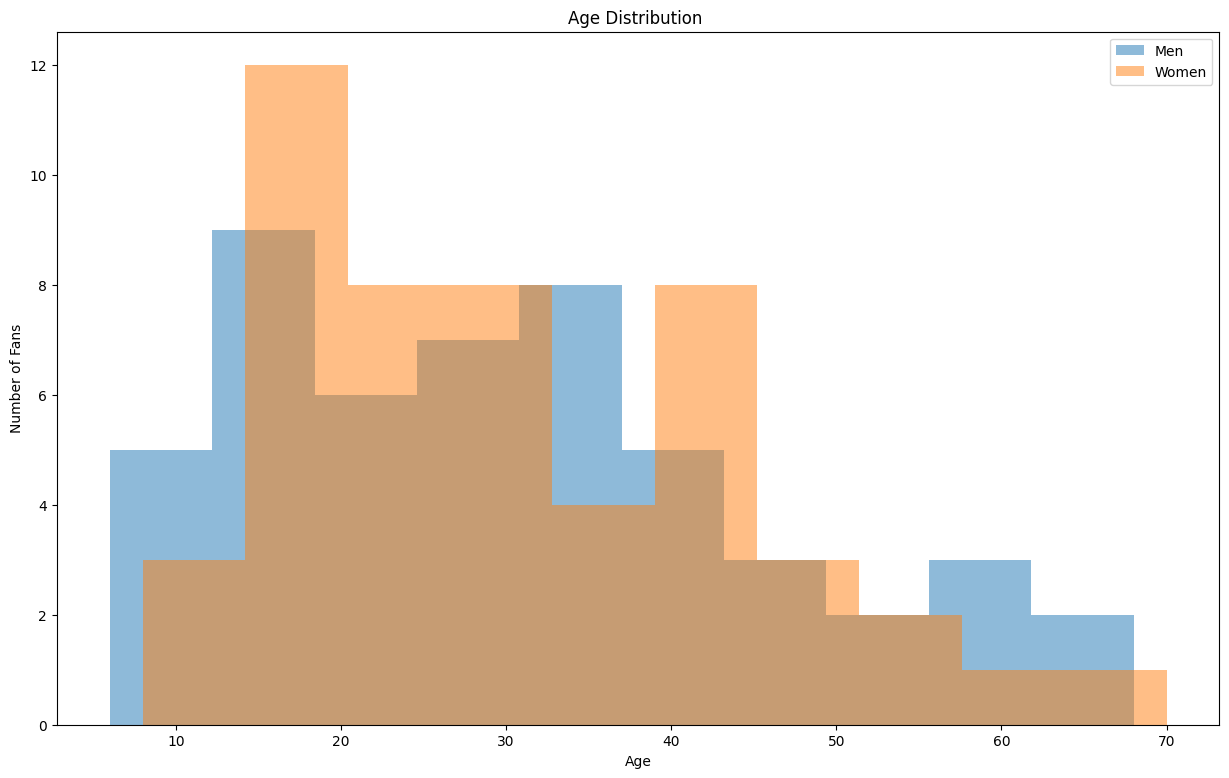

In [ ]:

mens_age = [52, 18, 27, 12, 24, 17, 68, 25, 12, 9, 51, 44, 42, 34, 44, 15, 21, 66, 61, 32,
            31, 20, 6, 13, 34, 38, 45, 17, 16, 15, 36, 21, 29, 21, 29, 9, 33, 15, 37, 27,
            31, 15, 57, 37, 27, 31, 38, 27, 60, 23]

womens_age = [36, 49, 20, 31, 51, 31, 15, 16, 39, 70, 52, 16, 39, 34, 18, 34, 30, 18, 26, 18,
              25, 16, 39, 49, 22, 37, 39, 21, 16, 63, 45, 43, 17, 28, 29, 23, 42, 23, 28, 55,
              41, 18, 23, 8, 13, 26, 13, 27, 28, 18]


plt.figure(figsize=(15, 9))

plt.hist(mens_age, alpha=0.5, label='Men')

plt.hist(womens_age, alpha=0.5, label='Women')

# Add title and labels
plt.title('Age Distribution ')
plt.xlabel('Age')
plt.ylabel('Number of Fans')
plt.legend()

# Show the plot
plt.show()


### part 2
The proper test here to see if the data is normal or not seems to be kolomogorov smirnov.We need to set a parameter for mean and STD of the normal distribution that we to compare our data with so we just use the mean and STD of data itself.

In [ ]:
# Perform Kolmogorov-Smirnov Test for Men's Ages
ks_men = kstest(mens_age, 'norm', args=(np.mean(mens_age), np.std(mens_age, ddof=1)))

# Perform Kolmogorov-Smirnov Test for Women's Ages
ks_women = kstest(womens_age, 'norm', args=(np.mean(womens_age), np.std(womens_age, ddof=1)))

# Display the test results for Men's Ages
print("men:")
print(f"Statistic: {ks_men[0]}, P-value: {ks_men[1]}")
print("\n")

print("Women:")
print(f"Statistic: {ks_women[0]}, P-value: {ks_women[1]}")


men:
Statistic: 0.08842162440486556, P-value: 0.7967166275264528


Women:
Statistic: 0.10733884316141562, P-value: 0.5749180880080975


Given the results we cannot reject that men and women distribution of age comes from a normal distribution.

### part 3
There are several conditions for parametric test such as normality assumption, independence of observations and Homogeneity of variances.as we saw in previous part we cannot reject that the distribution is normal and assuming the sampling was fair we can say that independence of observations and Homogeneity of variances are met too.

### part 4
In this part i used box-cox algorithm to normalize the data.

In [ ]:

mens_age_transformed, _ = boxcox(mens_age)
womens_age_transformed, _ = boxcox(womens_age)

# Perform Kolmogorov-Smirnov test for goodness of fit to a normal distribution on transformed data
ks_test_men_transformed = kstest(mens_age_transformed, 'norm', args=(np.mean(mens_age_transformed), np.std(mens_age_transformed, ddof=1)))
ks_test_women_transformed = kstest(womens_age_transformed, 'norm', args=(np.mean(womens_age_transformed), np.std(womens_age_transformed, ddof=1)))

# Print the results
print("Kolmogorov-Smirnov Test for New Data")
print("-----------------------")
print(f"Dn = {ks_test_men_transformed[0]}, P-value = {ks_test_men_transformed[1]}")
print(f"Dn = {ks_test_women_transformed[0]}, P-value = {ks_test_women_transformed[1]}")


Kolmogorov-Smirnov Test for New Data
-----------------------
Dn = 0.06496462225428873, P-value = 0.9751834914066209
Dn = 0.09752343408450787, P-value = 0.6918935935001451


Doing the transformation we see even higher p_value suggesting that it's probably more like normal now.

### part 5
Now having new data we perform t-test on transformed data.The test is that does men and woman's ditstribution differ significantly.

In [ ]:
t_statistic, p_value = ttest_ind(mens_age_transformed, womens_age_transformed)

alpha = 0.05

print("Independent Samples T-test Results:\n")
print(f"T-value: {t_statistic}")
print(f"P-value: {p_value}")


Independent Samples T-test Results:

T-value: 6.327105981160038
P-value: 7.498449556211095e-09


observing the results we can reject that two distributions are identical.

### part 6
To do what is wanted in this part the test i want to use is 2 sample KS test.

In [ ]:
ks_statistic, p_value = ks_2samp(mens_age, womens_age)

# Print the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)


KS Statistic: 0.12
P-value: 0.8692618870414056


We see that now the p-value is 0.869 meaning that unlike when we transformed data, now we cannot reject that two distributions are same.In other words if we did nonparametric test without transformation we couldn't reached the correct results.

### part 7
It seems that that when we used a transformation to change the distribution or when assuming a distribution is not very wrong, using parametric tests are prefered at least in this case.Specially knowing that parametric test usually have higher power.

## problem 4

### part 1

The chi-squared statistic for testing independence is given by:

$\chi^2 = \sum_{i=1}^{R} \sum_{j=1}^{C} \frac{\left(O_{ij} - E_{ij}\right)^2}{E_{ij}},
$

where $O_{ij}$ is the observed frequency in the $i$th row and $j$th column, and $E_{ij}$ is the expected frequency in the $i$th row and $j$th column under the assumption of independence.

Under the null hypothesis $H_0: \pi_{ij} = \pi_{i} * \pi_{j}$, the expected frequency $E_{ij}$ is given by:
$
E_{ij} = \frac{\text{Row Sum}_i \times \text{Column Sum}_j}{\text{Grand Total}},
$
where $\text{Row Sum}_i$ is the sum of the frequencies in the $i$th row, $\text{Column Sum}_j$ is the sum of the frequencies in the $j$th column, and $\text{Grand Total}$ is the sum of all frequencies in the table.

Since instead of having frequencies we have probablities of each pair(i,j) we insert that instead of the frequencies.with all that being said we have:

 Expected Frequencies Table (Eij) for Independence

|       | j=1 | j=2 | j=3 | Row Sum |
|-------|-------|-------|-------|---------|
| $i=1$ | 0.15  | 0.09  | 0.06  | 0.30    |
| $i=2$ | 0.15  | 0.09  | 0.06  | 0.30    |
| $i=3$ | 0.20  | 0.12  | 0.08  | 0.40    |
|-------|-------|-------|-------|---------|
| **Col Sum** | 0.50  | 0.30  | 0.20  |  

Given the formula provided earlier for $χ_2$ we see that :
$ \forall i, j: \quad E_{ij} = F_{ij} ⇒χ_2=0 ⇒p\_value =1 $

This means that we are in a region that is least indicative that rows and columns are not independent.

### part 2

In this part i did as wanted and saved frequencies of each cell in a list called ` hist_counts`.I plotted a histogram too to ensure that the distribution is close to what we expected.

Histogram Counts:
[47 26 21 38 22 24 63 29 30]


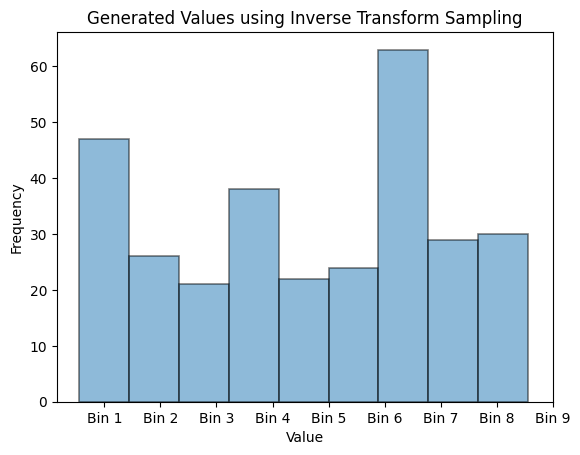

In [ ]:


# Define the 2D array of probabilities
probabilities = np.array([[0.15, 0.09, 0.06],
                          [0.15, 0.09, 0.06],
                          [0.20, 0.12, 0.08]])

# Flatten the array and calculate cumulative probabilities
cdf_values = np.cumsum(probabilities.flatten())

np.random.seed(0)
count = 300

random_numbers = np.random.rand(count)

# Function to map random numbers to corresponding values in CDF
def inverse_transform_sampling(random_number, cdf_values):
    for i, cdf_value in enumerate(cdf_values):
        if random_number <= cdf_value:
            return i

# Apply inverse transform sampling to generate values
generated_values = [inverse_transform_sampling(random_number, cdf_values) for random_number in random_numbers]

# Get histogram counts and bin edges
hist_counts, bin_edges = np.histogram(generated_values, bins=len(cdf_values), range=(0, len(cdf_values)))


print("Histogram Counts:")
print(hist_counts)


plt.hist(generated_values, bins=len(cdf_values), align='left', alpha=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Generated Values using Inverse Transform Sampling')
plt.xticks(range(len(cdf_values)), [f'Bin {i+1}' for i in range(len(cdf_values))])
plt.show()


### part 3
Now that we have new values for $f_{ij}$ we must subsitute them and calulate the new results. $H_0$ being that rows and columns are independent ,like the previous part we insert the $f_{ij}$ into the equation
$\chi^2 = \sum_{i=1}^{R} \sum_{j=1}^{C} \frac{\left(O_{ij} - E_{ij}\right)^2}{E_{ij}}
$.after inserting we find the value of $χ_2$ to be 1.45356 resulting in $p\_value = 0.8348$ given that $DOF = (3-1)(3-1)=4$.

In conclusion since $p\_value$ is larger than 0.05 we still cannot reject the hypothesis that rows and columns are independent.

In [ ]:
prb_from_freq = hist_counts.reshape(3,3)
chi2, p, dof, expected = chi2_contingency(prb_from_freq)

print("Chi-square statistic: {:.{}f}".format(chi2, 4))
print("Chi-square statistic: {:.{}f}".format(p, 4))
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n {expected}")

Chi-square statistic: 1.4536
Chi-square statistic: 0.8348
Degrees of freedom: 4
Expected frequencies: 
 [[46.37333333 24.12666667 23.5       ]
 [41.44       21.56       21.        ]
 [60.18666667 31.31333333 30.5       ]]


## problem 5

In first step we observe the the given table:

Contingency Table

|                      | No Moustache | Wears a Moustache | Row Sum |
|----------------------|--------------|-------------------|---------|
| Between 18 and 30    | 28           | 12                | 40      |
| Over 30               | 52           | 8                 | 60      |
| **Column Sum**        | 80           | 20                |         |

Now we make the expected values table which results in the below table:

Expected Frequencies Table (Eij) for Independence

|                      | No Moustache | Wears a Moustache |
|----------------------|--------------|-------------------|
| Between 18 and 30    | 32           | 8                |
| Over 30               | 48           | 12                |

To calculate the $χ_2$ we have:
$χ_2 = \frac{(32-28)^2}{32}+\frac{(12-8)^2}{8}+\frac{(52-48)^2}{48}+\frac{(8-12)^2}{12}=4.16667$
Given that $DOF=(2-1)*(2-1)=1$ we find $p\_value$ to be 0.041 meaning that with significance level of 0.05 we can reject that rows and columns are independent.

In [ ]:

data = {
    'Age Group': ['Between 18 and 30', 'Over 30', 'Between 18 and 30', 'Over 30'],
    'Moustache': ['No moustache', 'No moustache', 'Wears a moustache', 'Wears a moustache'],
    'Count': [28, 52, 12, 8]
}

df = pd.DataFrame(data)

contingency_table = pd.crosstab(index=df['Age Group'], columns=df['Moustache'], values=df['Count'], aggfunc='sum')

chi2, p, dof, expected = chi2_contingency(contingency_table,correction=False)

print("Chi-square statistic: {:.{}f}".format(chi2, 4))
print("Chi-square statistic: {:.{}f}".format(p, 4))
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n {expected}")

Chi-square statistic: 4.1667
Chi-square statistic: 0.0412
Degrees of freedom: 1
Expected frequencies: 
 [[32.  8.]
 [48. 12.]]


## problem 6

Like the previous question we calculate the $χ_2 $ and it's DOF and then based on them calculate the $p\_value$.

Contingency Table

| Blood Type | A   | AB  | B   | O   |
|------------|-----|-----|-----|-----|
| Rh Negative| 27  | 9   | 7   | 13  |
| Rh Positive| 89  | 19  | 54  | 82  |

Expected Frequencies Table

|            | O       | A       | B       | AB      |
|------------|---------|---------|---------|---------|
| Rh positive| 21.65   | 5.23    | 11.39   | 17.73   |
| Rh negative| 94.35   | 22.77   | 49.61   | 77.27   |

with above tables we have that :
$χ_2 = \frac{(27-21.65)^2}{21.65}+\frac{(9-5.23)^2}{5.23}+...+\frac{(82-77.27)^2}{77.27}=8.603$ and $DOF = (4-1)(2-1) = 3$.given this statistics we have that $p\_value = 0.035 $ hence we reject the hypothesis.

In [ ]:

data = {
    'Blood Type': ['O', 'A', 'B', 'AB', 'O', 'A', 'B', 'AB'],
    'Rh': ['Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative'],
    'Count': [82, 89, 54, 19, 13, 27, 7, 9]
}

df = pd.DataFrame(data)

contingency_table = pd.crosstab(index=df['Rh'], columns=df['Blood Type'], values=df['Count'], aggfunc='sum')
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n{expected}")

Blood Type   A  AB   B   O
Rh                        
Negative    27   9   7  13
Positive    89  19  54  82
Chi-square statistic: 8.603698496641742
P-value: 0.035051452790187024
Degrees of freedom: 3
Expected frequencies: 
[[21.65333333  5.22666667 11.38666667 17.73333333]
 [94.34666667 22.77333333 49.61333333 77.26666667]]


## problem 7


### part 1
To show that minimmum $D_n$ is 0.1 and it happens only when we have F(y1) = 0.1, F(y2) =0.3, F(y3) = 0.5, F(y4) = 0.7, and F(y5) = 0.9 we shall use limits in sharp changes points.
to do this we have :

$D_n = sup|F_n(x)-F(x)|$

Using this equation we will have:

\begin{cases}
|F_n(y_1^-)-F(x)|=0.1 ⇒ 0<F(y_1^-)<0.1 \newline
|F_n(y_1^+)-F(x)|=0.1 ⇒ 0.1<F(y_1^+)<0.3 \newline
\end{cases}
Given that F(x) is continuos we can say that $F(y_1)=0.1$.Similarly for $y_2$:


\begin{cases}
|F_n(y_2^-)-F(x)|=0.1 ⇒ 0.1<F(y_2^-)<0.3 \newline
|F_n(y_2^+)-F(x)|=0.1 ⇒ 0.3<F(y_2^+)<0.5 \newline
\end{cases}
Which leads to $F(y_2)=0.3$.Doing this for other points will result in $F(y_3)=0.5$, $F(y_4)=0.7$ and $F(y_5)=0.9$.
To prove that given this F(y) values $D_n$ will be 0.1 we need to know that the distance between any number between 0 and 1 and set of $F_n(y)$ values(0, 0.2, ..., 1) is not more than 0.1.

### part 2
To solve this part we have same equations as before but RHS of this equations are different so we solve them again.


\begin{cases}
|F_n(y_1^-)-F(x)|=0.2 ⇒ 0<F(y_1^-)<0.2 \newline
|F_n(y_1^+)-F(x)|=0.2 ⇒ 0<F(y_1^+)<0.4 \newline
\end{cases}

and for $y_2$

\begin{cases}
|F_n(y_2^-)-F(x)|=0.2 ⇒ 0<F(y_1^-)<0.4 \newline
|F_n(y_2^+)-F(x)|=0.2 ⇒ 0.2<F(y_1^+)<0.6 \newline
\end{cases}
Next thing we need to do is to return intesection of two answers as the answer to the problem so we will have:
\begin{cases}
0 \leq F(y_1)\leq0.2 \newline
0.2\leq F(y_2)\leq0.4 \newline
0.4\leq F(y_3)\leq0.6 \newline
0.6\leq F(y_4)\leq0.8 \newline
0.8\leq F(y_5)\leq1 \newline
\end{cases}

## problem 8
In this problem we aim to perform kolomogorov-smirnov test to know whether the given data comes from a distrution or not.

### Uniform Distribution Hypothesis
In the first part we assess that is data coming from a $Uniform[0,1]$ or not. In order to perform kolomogorov-smirnov test , first we sort the data accending and then compare the empirical CDF of our data to the CDF of original data which we know that CDF(uniform[0,1])=x.Then we find maximumm difference between these two and name it as $D_n$ and at last given the $D_n$ will evaluate the hypothesis.Performing the test we will have $D_n = 0.18$ which results in $p\_value=0.35$.At the 15th element, where the value is 0.42, the occurrence of $D_n$ leads to the mentioned $D_n$.Given the $p\_value$ we cannot reject that data comes from a uniform distribution.


In [ ]:
data = np.array([0.42, 0.06, 0.88, 0.40, 0.90,
                 0.38, 0.78, 0.71, 0.57, 0.66,
                 0.48, 0.35, 0.16, 0.22, 0.08,
                 0.11, 0.29, 0.79, 0.75, 0.82,
                 0.30, 0.23, 0.01, 0.41, 0.09])

D, p_value = stats.kstest(data, 'uniform', args=(0, 1))
print(f'Dn: {D}')
print(f'p-value: {p_value}')

data.sort()
cdf_empirical = np.linspace(start=1, stop=25, num=25) / 25
arg_max = np.argmax(cdf_empirical - data)

print(f'Max CDF Difference: {cdf_empirical[arg_max]} at data point: {data[arg_max]}')


Dn: 0.18
p-value: 0.3501198034535574
Max CDF Difference: 0.6 at data point: 0.42


### Continuous Distribution Hypothesis
In this part,again we want to use KS test but the difference is that the distribution we want to do comparisson with is different so we must define a new CDF.All other steps are same and doing them we will have $D_n=0.28$ at n=16 yielding $p\_value=0.28$ which means that we cannot reject the hypothesis that this data comes from the given distribution.

CDF of given distribution:
\begin{cases}
0 & \text{if } x \leq 0 \newline
1.5x & \text{if } 0 < x < 0.5 \newline
0.5 + \frac{x}{2} & \text{if } 0.5 \leq x < 1 \newline
1 & \text{if } x \geq 1
\end{cases}

In [ ]:
def cdf_b(x):
    if x <= 0:
        return 0
    elif 0 < x < 0.5:
        return 1.5 * x
    elif 0.5 <= x < 1:
        return 0.5 + x/2
    else:
        return 1
cdf_vec = np.vectorize(cdf_b)
D, p_value = stats.kstest(data, cdf_vec(data))
print(f'Dn: {D}')
print(f'p-value: {p_value}')

data.sort()
cdf_empirical = cdf_vec(data)
arg_max = np.argmax(cdf_empirical - data)

print(f'Max CDF Difference: {cdf_empirical[arg_max]} at data point: {data[arg_max]}')


Dn: 0.28
p-value: 0.2850421476958367
Max CDF Difference: 0.72 at data point: 0.48


### Posterior Probability Assessment
Given the prior probabilities and the likelihoods for the uniform and the given
distributions,we just insert the values to find the marginal likelihood and then using $P(\text{uniform} | \text{data}) = \frac{L(\text{uniform}) \cdot P(\text{uniform})}{P(\text{data})}$ we can find both $P(\text{uniform} | \text{data})$ and $P(\text{given distribution} | \text{data})$.Doing the calculations we will have:

$P(\text{uniform} | \text{data})=0.438$

$P(\text{given distribution} | \text{data})=0.562$

indicating that the data is more likely to come from the given distribution.

In [ ]:
P_uniform = 1/2
P_given_pdf = 1/2

L_uniform = 1

f_x = lambda x: 3/2 if 0 < x <= 1/2 else (1/2 if 1/2 < x < 1 else 0)
L_given_pdf = np.prod([f_x(xi) for xi in data])

P_data = L_uniform * P_uniform + L_given_pdf * P_given_pdf

P_uniform_given_data = (L_uniform * P_uniform) / P_data

print("Posterior Probability for Uniform Distribution:", P_uniform_given_data)


Posterior Probability for Uniform Distribution: 0.4380408216570839


## problem 9
In this problem we want to do kolomogorov-smirnov test for on 2 sample.In this part too when doing kolomogorov smirnov test we want to find $D_n$ but unlike previous part both CDFs are empirical.so what we must do is to sort both lists in one list and then move from smallest element to largest element and then after iterating on all data we will find $D_n$ which using that we can find $p\_value$ and speak on credit of our hypothesis.

### Comparison of Two Distributions

In [ ]:
sample_f = np.array([
    [0.61, 0.29, 0.06, 0.59, -1.73],
    [-0.74, 0.51, -0.56, -0.39, 1.64],
    [0.05, -0.06, 0.64, -0.82, 0.31],
    [1.77, 1.09, -1.28, 2.36, 1.31],
    [1.05, -0.32, -0.40, 1.06, -2.47]
])

sample_g = np.array([
    [2.20, 1.66, 1.38, 0.20],
    [0.36, 0.00, 0.96, 1.56],
    [0.44, 1.50, -0.30, 0.66],
    [2.31, 3.29, -0.27, -0.37],
    [0.38, 0.70, 0.52, -0.71]
])

# Flatten the arrays since ks_2samp expects 1D arrays
flat_sample_f = sample_f.flatten()
flat_sample_g = sample_g.flatten()

# Perform the Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(flat_sample_f, flat_sample_g)

print("Kolmogorov-Smirnov statistic:", statistic)
print("P-value:", p_value)




Kolmogorov-Smirnov statistic: 0.27
P-value: 0.33570035263225584


From the $p\_value$ output of this part we can not reject that two distribution have the same distribution.

### Shifted Distribution Comparison


In [ ]:
flat_sample_f_part_b = sample_f.flatten() + 2
flat_sample_g_part_b = sample_g.flatten()

# Perform the Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(flat_sample_f_part_b, flat_sample_g_part_b)

print("Kolmogorov-Smirnov statistic:", statistic)
print("P-value:", p_value)



Kolmogorov-Smirnov statistic: 0.56
P-value: 0.000995587375361461


Unlike the previous part now we see that the $p\_value$ has dropped to almost 0.001.This indicates that the shift was enough to make two distributions distinguishable.

### Scaled Distribution Comparison

In [ ]:
flat_sample_f_part_c = sample_f.flatten()
flat_sample_g_part_c = sample_g.flatten()*3

# Perform the Kolmogorov-Smirnov test
statistic, p_value = ks_2samp(flat_sample_f_part_c, flat_sample_g_part_c)

print("Kolmogorov-Smirnov statistic:", statistic)
print("P-value:", p_value)


Kolmogorov-Smirnov statistic: 0.5
P-value: 0.004861780555388566


In this part too we se that the $p\_value$ is very low and because it's below even 0.01 we can say that scaling by 3 changed the distribution in this case.

## problem 10

### part 1

#### part a,b,c,e

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/datasets/inference/hw3/titanic.csv')
sex_survive_table = pd.crosstab(titanic['Sex'], titanic['Survived'])

# Define a function to label mosaic plot segments
dict_key = {'1':'survived', '0':'not survived'}
def labelizer(k):
    return f"{k[0]} - {dict_key[k[1]]}"
print(sex_survive_table)

Survived    0    1
Sex               
female     81  233
male      468  109


#### part d,f

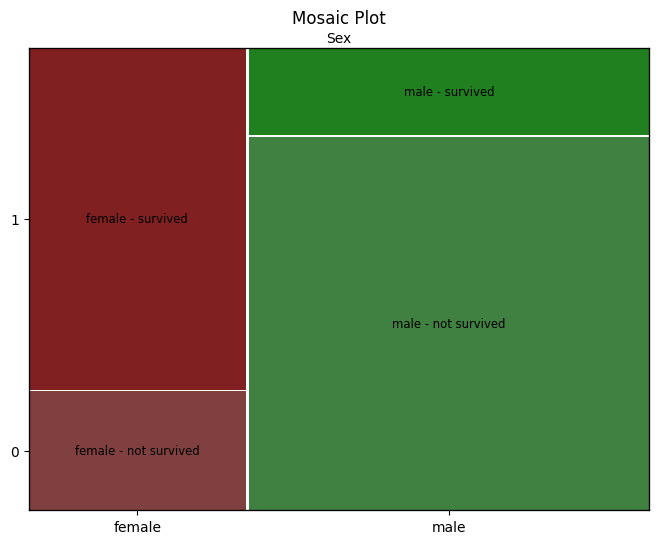

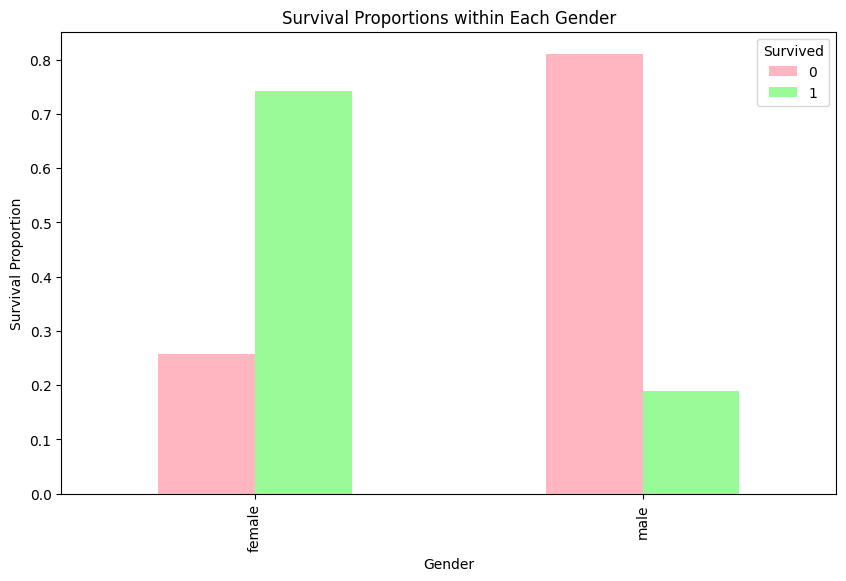

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
mosaic(sex_survive_table.stack(), title='Mosaic Plot', ax=ax, labelizer=labelizer, properties={'edgecolor': 'black'})


plt.xlabel('Sex')
plt.ylabel('survived')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

survival_proportions = sex_survive_table.div(sex_survive_table.sum(axis=1), axis=0)

survival_proportions.plot(kind='bar', stacked=False, color=['#FFB6C1', '#98FB98'], ax=ax)


plt.xlabel('Gender')
plt.ylabel('Survival Proportion')
plt.title('Survival Proportions within Each Gender')

# Show the plot
plt.show()


### part 2

#### part a,b,d
The conditions for $χ_2$ test is that the observations must be independent, sample size must be big enough and variables should be categorical.After performing this test we see strong evidence agains $H_0$ being that survival is independent from gender.DOF also becomes 1 which is equal to (2-1)*(2-1).

In [ ]:

chi2_stat, p_value, dof, expected = stats.chi2_contingency(sex_survive_table)

print(f"Chi-squared value: {chi2_stat}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value}")


Chi-squared value: 260.71702016732104
Degrees of freedom: 1
P-value: 1.1973570627755645e-58


#### part c,e
In this part i did fisher test.Results imply even stronger evidence again independence of gender from survival.

In [ ]:
odds_ratio, fisher_p_value = stats.fisher_exact(sex_survive_table)

print(f"Odds Ratio: {odds_ratio}")
print(f"P-value (Fisher's exact test): {fisher_p_value}")

Odds Ratio: 0.08096731594585672
P-value (Fisher's exact test): 6.463921564583144e-60


## problem 11

### part 1
1. True. Even if a difference is highly significant, there is always a possibility that it occurred by chance. Statistical significance does not guarantee practical significance.

2. False. A large, noteworthy number does not necessarily mean it is statistically significant. Statistical significance is determined by factors like sample size and variability.

3. True. A p-value of 4.7% is considered statistically significant, while 5.2% is not. The p-value represents the probability of obtaining results as extreme as the observed ones if the null hypothesis is true.

### part 2
1. A test of significance addresses whether the observed difference is likely to have occurred by chance.

2. While the importance of the difference is a valid consideration, this is typically addressed through effect size measures rather than a test of significance. Significance tests focus on whether the observed difference is statistically significant.

3. A significance test doesn't prove causation or provide a detailed explanation of the difference. It only indicates whether the observed difference is likely to be statistically significant or if it could have occurred by chance.

4. The design of the experiment is indeed crucial, but it's not the primary focus of a significance test. The significance test evaluates the observed data in the context of a specific hypothesis and statistical model, determining whether the results are likely due to chance or if they provide evidence against a null hypothesis. The adequacy of the experimental design is important, but it's typically considered separately from the significance test itself.

### part 3
False. The statement that the investigator with the lesser p-value is the one whose average is furthest away from 50 needs further qualification. The p-value considers both the effect size (how far the observed average is from the null hypothesis) and the sample size. While a smaller p-value generally suggests a more significant deviation from the null hypothesis, it's crucial to recognize that the larger sample size contributes to the precision of the estimate.

In some cases, the investigator with the smaller p-value may indeed have a more substantial effect size, but this might be influenced by the larger sample size rather than a more extreme difference. Therefore, a comprehensive interpretation of the results should consider both effect size and sample size.

### part 4

In this scenario, if each company in the city hires employees without bias, using a fair random selection process for hiring, the racial makeup of their workforce should match the city's overall population. In simpler terms, there should be no discrimination in hiring.

If a statistical test (z-test) shows a significant difference between the percentage of White employees at a company and the city's overall White population, it suggests that the company's workforce differs more than expected by chance. In the given context, if all companies use fair, random hiring processes, the test should not indicate discrimination. If it does, it could mean either a problem with the assumed fairness in hiring or, more likely, bias in a company's hiring practices leading to a non-random distribution of employees by race.

## problem 12

### part 1
the probablity that we reject the hypothesis even if it's true equals to :

$P(X < 40) + P(X > 60)$

With

$
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
$

we wil have $P(X < 40) + P(X > 60)
 =0.0352$.So with probablity of 0.0352 we will reject $H_0$ even though it's true.

### part 2
Given that α equals to value of type I error from previous part we see that α is 0.352.

### part 3

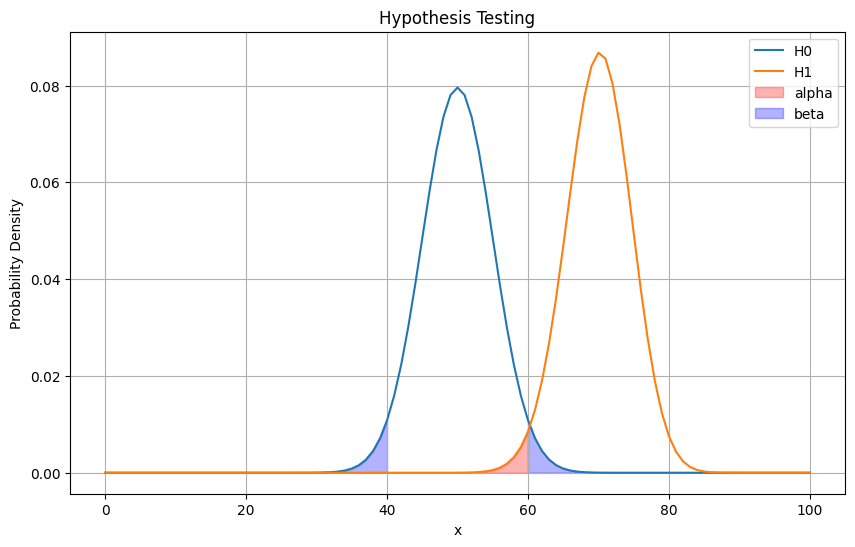

In [ ]:
n = 100
p_fair = 0.5
p_unfair = 0.7

x = np.arange(0, n+1)
y0 = binom.pmf(x, n, p_fair)
y1 = binom.pmf(x, n, p_unfair)

plt.figure(figsize=(10, 6))
plt.plot(x, y0, label='H0')
plt.plot(x, y1, label='H1')
plt.fill_between(x, 0, y1, where=(x<=60), interpolate=True, color='red', alpha=0.3, label='alpha')
plt.fill_between(x, 0, y0, where=(x<=40), interpolate=True, color='blue', alpha=0.3, label='beta')
plt.fill_between(x, 0, y0, where=(x>=60), interpolate=True, color='blue', alpha=0.3)

plt.legend()
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Hypothesis Testing')
plt.grid(True)
plt.show()


In above graph we have Β and α shown.

In [ ]:
sample_size = 100
unfair_probability = 0.7
num_iterations = 50000

# Analytical Calculation of β (Type II Error) and strength of the test
type_ii_error = binom.cdf(60, sample_size, unfair_probability) - binom.cdf(39, sample_size, unfair_probability)
test_strength = 1 - type_ii_error

# Simulating tosses for the unfair coin
np.random.seed(0)
heads_count_unfair_simulated = np.random.binomial(sample_size, unfair_probability, num_iterations)
type_ii_error_simulated = np.mean((heads_count_unfair_simulated >= 40) & (heads_count_unfair_simulated <= 60))
test_strength_simulated = 1 - type_ii_error_simulated

print(f"Analytical Type II Error (β): {type_ii_error:.4f}")
print(f"Analytical Test Strength: {test_strength:.4f}")
print("\nSimulation Results:")
print(f"Simulated Type II Error (β): {type_ii_error_simulated:.4f}")
print(f"Simulated Test Strength: {test_strength_simulated:.4f}")


Analytical Type II Error (β): 0.0210
Analytical Test Strength: 0.9790

Simulation Results:
Simulated Type II Error (β): 0.0207
Simulated Test Strength: 0.9793


As we see power is very near to what can be derived analyticaly.

## problem13

### part 1
Because we are comparing means, samples are independent, the distribution is normal and we have enough samples(>30) the proper test seems to be z-test.

### part 2
To perform this test we will have :

$ Z = \frac{(\bar{X}_1 - \bar{X}_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} ⇒\frac{(70 - 74)}{\sqrt{\frac{4^2}{50} + \frac{6^2}{65}}}≈-4.279
$

$Z(-4.279)=1.87733*10^{-5} = p_{value}$

Given this p value we can strongly reject $H_0$ and the differnce is significant.

## problem14

### part 1
This is an observational study. In an observational study, the researcher observes and measures the characteristics of interest without intervening or manipulating the study subjects. In this case, the researcher is observing and comparing the spatial aptitude scores of people who play video games to those who don't.

### part 2
In this part we will use t-test to compute the $p_{value}$.We will have:

- $ var1 = 400 $ (variance of group 1)
- $ var2 = 2500 $ (variance of group 2)
- $ n1 = 15 $ (size of group 1)
- $ n2 = 20 $ (size of group 2)
- $ \text{mean1} = 120 $
- $ \text{mean2} = 100 $
- $ DOF = 20-1+15-1 = 33$

$⇒t =\frac{120-100}{\sqrt{\frac{400}{15} + \frac{2500}{20}}}=1.624 ⇒ p_{value}=0.114$

Which is not significant at 0.01 or 0.05 level.

In [ ]:
mean1 = 120
mean2 = 100
var1 = 400
var2 = 2500
n1 = 15
n2 = 20

se = math.sqrt(var1/n1 + var2/n2)


df = n1 + n2 - 2


t_stat = (mean1 - mean2) / se

# Calculate the p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: 1.6239958858823003
p-value: 0.11389181557420991


### part 3
A substantial difference in spatial aptitude scores between the two groups may suggest a relationship between playing video games and enhanced spatial aptitude. However, correlation does not imply causation. There could be other confounding variables or factors influencing the results. For example, individuals who play video games more may have different educational backgrounds, socioeconomic statuses, or cognitive abilities that could contribute to the observed difference. It's essential to consider these alternative explanations before concluding that playing video games directly enhances spatial aptitude. Experimental studies with controlled conditions are often needed to establish causal relationships.

## problem 15

### part 1
Plugging in the variables we have:

$ \text{Power} = \Phi\left( z_{\alpha} + \frac{n^{\frac{1}{2}} (\mu_A - \mu_0)}{\sigma} \right)= \Phi\left( 1.65 + \frac{49^{\frac{1}{2}} (0.5)}{49} \right)= \Phi(2.15)=0.984$


### part 2
We have that $ \beta = 1 - \text{Power}$ so  we will have $ \beta = 0.016 = type II error$


### part 3
We have α=0.99 so $Z_{power}$ becomes 2.326 results in:
$Z_α+\frac{n^{1/2}(μ_α-μ_0)}{σ}=2.326 \Rightarrow  n = \left(\frac{(2.326 - z_\alpha) \times \sigma}{\mu_A - \mu_0}\right)^2 $

Inserting the variables we will have :

$n≈91$

## problem 16

### part 1

Value of alpha in this part equals to the probablity of X<40 or x>60. so we just need to calculate them and their sum will be alpha.

In [ ]:
from scipy.stats import binom

n = 100
p_null = 0.5

threshold_upper = 60
threshold_lower = 40

# Calculate alpha for the upper tail
alpha_upper = 1 - binom.cdf(threshold_upper, n, p_null)

# Calculate alpha for the lower tail
alpha_lower = binom.cdf(threshold_lower - 1, n, p_null)

# Total alpha for the two-tailed test
total_alpha = alpha_upper + alpha_lower

print(f"Alpha for the upper tail: {alpha_upper:.4f}")
print(f"Alpha for the lower tail: {alpha_lower:.4f}")
print(f"Total Alpha for the two-tailed test: {total_alpha:.4f}")


Alpha for the upper tail: 0.0176
Alpha for the lower tail: 0.0176
Total Alpha for the two-tailed test: 0.0352


As we see in the above output, α equals to 0.0352 meaining that the probablity that X dont fall into 40<x<60 region is only 0.352 if the distribution is binomial(100,0.5).

### part 2
To plot the power graph we need to change $H_A$ from 0 to 1 and calculate power for each point given the new $H_A$.

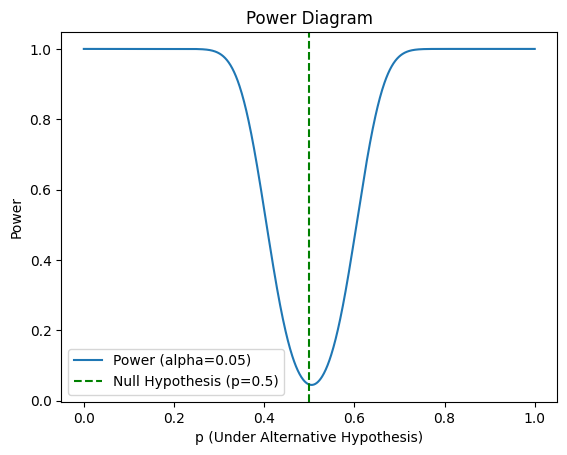

In [ ]:


n = 100
p_null = 0.5

p_alternative_values = np.linspace(0, 1, 1000)

# Function to calculate power for a given p under H1
def calculate_power(p_alternative):
    threshold_upper = binom.ppf(1 - alpha/2, n, p_null)
    threshold_lower = binom.ppf(alpha/2, n, p_null)
    power = 1 - binom.cdf(threshold_upper, n, p_alternative) + binom.cdf(threshold_lower, n, p_alternative)
    return power

# Calculate power for each value of p_alternative
powers = [calculate_power(p) for p in p_alternative_values]

plt.plot(p_alternative_values, powers, label=f'Power (alpha={alpha})')
plt.axvline(x=0.5, color='g', linestyle='--', label='Null Hypothesis (p=0.5)')
plt.xlabel('p (Under Alternative Hypothesis)')
plt.ylabel('Power')
plt.title('Power Diagram')
plt.legend()
plt.show()


As we see the power around 0.5 is very low which considering $H_0 = 0.5$ was expected.

## problem 17
$\Lambda = \frac{θ_0^n e^{-θ_0Σx_i}} {θ^n e^{-θΣx_i}} \Rightarrow -2log(\Lambda) = -2nlog(\frac {θ_0}{θ})-2log(e^{(θ -θ_0)Σx_i}) $

further simplification:

$-2log(\Lambda) = 2n(log(θ) - log(θ_0))+2((θ -θ_0)Σx_i) $

From MLE we have:

$\bar{x} = \frac{Σx_i}{n} \Rightarrow Σx_i = n \bar{x}=nθ $

Also from propertis of exponential distribution we have that:

$\theta = \frac{1}{\bar{x}}$

Which is the best estimation for theta with given data and maximizes the likelihood.subtituting the parameters we have:

$-2log(\Lambda) = 2n(\bar{x}θ_0 -log(\bar{x} θ_0)-1)$

And we know that $-2log(\Lambda)$  have a $χ^2$ distribution and because we have only one parameter it is a $χ^2$ with only one DOF.

Now we caculate the critical region for the given distribution:

${
\begin{cases}
    χ_{1,0.025}^2 = 0.001 \\
    χ_{1,0.975}^2 = 5.023
\end{cases}
}$

So if the value of $-2log(\Lambda)$ become less than 0.0001 or more then 5.023 the hypotheses is rejected otherwise we cannot reject it.

## problem 18


### part 1


In first part of the question I used t-test to determine whether it must be rejected or not.Inserting the parameters we will have $t=\frac{25.9-28}{\frac{5.6}{\sqrt{50}}}=-2.6516$. Considering that DOF=50-1 =49 will result in $p_{value}=0.005$ which is below 0.05 hence it rejects the $H_0$ being μ>28.

In [ ]:
sample_mean = 25.9
sample_std = 5.6
sample_size = 50
null_hypothesis_mean = 28
alpha = 0.05
alternative = 'less'  # For one-tailed test

# Calculate the t-statistic
t_statistic = (sample_mean - null_hypothesis_mean) / (sample_std / math.sqrt(sample_size))

# Calculate the critical value for a one-tailed test
critical_value = stats.t.ppf(alpha, df=sample_size - 1)

# Perform the t-test
p_value = stats.t.cdf(t_statistic, df=sample_size - 1)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -2.651650429449555
P-value: 0.005380320766813442


### part 2
To find the power of this this test what we can do is to use critical value found in the previous part and then assuming T distribution of mean 27,DOF of 49 and STD derived from sample calculate the cdf of point critical value.

$Type \ II\ Error\ Probability=F(critical point)$

$F=CDF(t(mean=27,DOF=49, STD=\frac{5.6}{\sqrt{50}}))$

In [ ]:

# Calculate the probability of Type II error
true_mean = 27
type_ii_error_probability = stats.t.cdf(critical_value, df=sample_size - 1, loc=true_mean, scale=sample_std / math.sqrt(sample_size))


print(f"Probability of Type II Error: {type_ii_error_probability}")


Probability of Type II Error: 2.5019685009147194e-37


Type II error became $2.5*10^{-37}$ meaning that assuming true mean=27, test is very powerfull.

## problem 19
1) **Conclusions from the Study:**
   - The sample mean of 130 minutes suggests that, on average, the surgeries in the study took around 130 minutes.
   - The 95% confidence interval (CI) of 128.5 to 131.5 minutes indicates a range within which we can be 95% confident that the true population mean duration lies.
   - This suggests that the researchers are reasonably certain about the average duration of the surgery, and it provides a measure of the precision of the estimate.

2) **Bootstrap Method for Confidence Interval of the Median:**
   - To construct a confidence interval for the median using the bootstrap method:
     - Sample with replacement from the observed data to create multiple bootstrap samples.
     - For each bootstrap sample, calculate the median.
     - Create a distribution of bootstrap medians.
     - Use percentiles of this distribution to form the confidence interval.

3) **Advantages of Bootstrap Method:**
   - **Distribution-Free:** The bootstrap method doesn't assume a specific distribution for the data, making it more robust when data assumptions are unclear.
   - **Versatility:** It can be applied to various statistics (not just means), like medians or any other parameter of interest.
   - **No Need for Assumptions:** Unlike parametric methods, the bootstrap method doesn't require assumptions about the underlying population distribution.

4) **Is Bootstrap Always the Best Method?**
   - No, the choice between methods depends on the nature of the data and the research question.
   - Bootstrap may be advantageous when assumptions of parametric methods are violated, but for large, well-behaved datasets, parametric methods might be computationally more efficient and yield precise results.

5) **Bootstrap Statistics and Calculation:**
   - **Bootstrap Statistics:** These are values obtained by applying a statistical procedure to multiple bootstrap samples.
   - **Calculation:**
     - Take random samples with replacement from the observed data.
     - Calculate the statistic of interest for each bootstrap sample.
     - Aggregate the results, often by calculating the mean, median, or constructing a confidence interval from the distribution of bootstrap statistics.
In summary, the bootstrap method is a powerful tool in statistics, offering flexibility and robustness in estimating parameters and constructing confidence intervals without stringent distributional assumptions. However, its suitability depends on the specific characteristics of the data and the research objectives.

## problem 20

### part a,b,c

In [ ]:
np.random.seed(0)

sample = np.random.beta(2, 5, 50)

M = np.median(sample)

# Perform a one-sample Wilcoxon signed rank test
# H0: median is 0.4, H1: median is not 0.4
_, p_value_04 = stats.wilcoxon(sample - 0.4)

# Calculate the power of the test
power_04 = smp.tt_solve_power(effect_size=(0.4 - M) / np.std(sample), nobs=50, alpha=0.05, alternative='larger')

# Increase the value of 0.4 in the first part to 0.6 and repeat both parts
_, p_value_06 = stats.wilcoxon(sample - 0.6)
power_06 = smp.tt_solve_power(effect_size=(0.6 - M) / np.std(sample), nobs=50, alpha=0.05, alternative='larger')

# Compare the results obtained in part c with part a and justify the change in the power
comparison = "Increase" if power_06 > power_04 else "Decrease"

print(f"Median: {M}")
print(f"P-value for H0: M = 0.4: {p_value_04}")
print(f"Power of the test for H0: M = 0.4: {power_04}")
print(f"P-value for H0: M = 0.6: {p_value_06}")
print(f"Power of the test for H0: M = 0.6: {power_06}")
print(f"The power of the test {comparison} when the median under H0 increases from 0.4 to 0.6.")


Median: 0.2298694450983968
P-value for H0: M = 0.4: 5.951474850718341e-07
Power of the test for H0: M = 0.4: 0.9999999999999661
P-value for H0: M = 0.6: 5.861977570020827e-14
Power of the test for H0: M = 0.6: 1.0
The power of the test Increase when the median under H0 increases from 0.4 to 0.6.


### part d
As we saw in the output of previous cell, when i created a sample with size 50, median of that became about 0.23.using wilcoxon test resulted in $p_{value}=5.951*10^{-7}$ for $H_0=0.4$ meaning that we can reject $H_0$ strongly and power of this test is $1-10^{-16}$.

When we do this test again with $H_0=0.6$ , $p_{value}$decreases to $p_{value}=5.862*10^{-14}$ which means stronger reject and power increases to near 1.

We see that when we change $H_0$ from 0.4 to 0.6, $p_{value}$ decreases and power increases meaning that we have stronger evidence against the $H_0$.As said median of this sample was 0.23 and it's reasonable that moving further from 0.23 leads to drop in $p_{value}$ and increase in power.

## problem 21


### part 1
Given that we are testing that if varince of two samples are equal or not and the samples are from normal distribution ,the suitable test is F test. SO we can insert values of variance of each sample and then considering the DOF, reason about rejection of this test.

### part 2

In [ ]:
def perform_f_test(sample_var_x, sample_var_y, n1, n2, alpha=0.05):

    f_statistic = sample_var_x / sample_var_y


    df_x = n1-1
    df_y = n2-1

    # Calculate the critical value from the F-distribution
    critical_value = f.ppf(1 - alpha / 2, df_x, df_y)

    # Calculate the p-value
    p_value = 2 * min(f.cdf(f_statistic, df_x, df_y), 1 - f.cdf(f_statistic, df_x, df_y))

    print("F-Statistic:", f_statistic)
    print("P-Value:", p_value)


np.random.seed(0)
sample_x = np.random.normal(0, np.sqrt(3), 100)
sample_y = np.random.normal(0, np.sqrt(10), 100)


perform_f_test(np.var(sample_x, ddof=1), np.var(sample_y, ddof=1), 100, 100)

F-Statistic: 0.28466865565856736
P-Value: 1.4779833592241796e-09


After performing simulation and test we see that $p_{value}$ becomes $1.478*10^{-10}$ which means that we can strongly reject $H_0: variance\ of\ two\ sample\ are\ same.$

## problem 22

### part a
I found KS test to be a proper test for this $H_0$. To do this test as usual we must create empirical CDF from the frequencies provided in given table and then find $D_n$ usind CDF of binom(12, 0.5).In python we use `kstest` to this process for us.

### part b

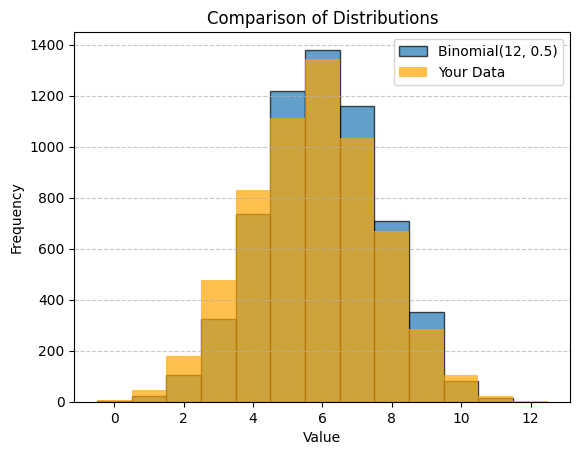

In [ ]:
observed_frequencies = np.array([7, 45, 181, 478, 829, 1112, 1343, 1033, 670, 286, 104, 24, 3])

np.random.seed(0)

binomial_variables = np.random.binomial(12, 0.5, 6115)

plt.hist(binomial_variables, bins=np.arange(0, 13) - 0.5, edgecolor='black', alpha=0.7, label='Binomial(12, 0.5)')

plt.bar(np.arange(0, 13) , observed_frequencies, width=1, alpha=0.7, color='orange', label='Your Data')

plt.title('Comparison of Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()


plt.show()


### part c

In [ ]:

total_families = np.sum(observed_frequencies)

p_binom = 0.5
expected_probabilities = binom.pmf(np.arange(13), 12, p_binom)


ks_statistic, ks_p_value = kstest(observed_frequencies, cdf='binom', args=(13, p_binom))

print(f'KS Statistic: {ks_statistic}')
print(f'P-value: {ks_p_value}')


KS Statistic: 0.8461538461538461
P-value: 5.503918822368613e-11


Results of the KS test indicates that there is strong evidence to reject $H_0$ which was that the observed data has same distribution with binom(12,0.5) because $p_{value}$ is far below 0.01.Considering the histogram of part b it was expected to have this as we see a huge difference in bin 5 and 7.